In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from collections import Counter, OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

pd.set_option('display.max_colwidth', None)
plt.style.use('seaborn-darkgrid')
main_color = "#118ab2"

In [2]:
# Load dataset
main_dataset = '../input/indonesian-tweet-about-teroris-terrorism/indonesian_tweet_about_teroris.csv'
stopwords_dataset = '../input/indonesian-stoplist/stopwordbahasa.csv'
slang_word_dataset = '../input/indonesian-abusive-and-hate-speech-twitter-text/new_kamusalay.csv'

In [3]:
df =  pd.read_csv(main_dataset)
df.head()

,tweet id,name,username,tweet text,reference type,reference id,created at,like,quote,reply,retweet,tweet url,mentions,hashtags
0,1488784650898403330,Jedar,Mottakaal,"@begoeloh @widiajaya88 @Ndaxwz @hsnsaputro @yunartowijaya Bangsa Indonesia bukan teroris, tapi kadrun hanya kadrun yg nempel jdi benalu bagi bangsa Indonesia",replied_to,1.488752e+18,2022-02-02T08:01:35.000Z,0,0,0,0,https://twitter.com/Mottakaal/status/1488784650898403330,"@begoeloh,@widiajaya88,@Ndaxwz,@hsnsaputro,@yunartowijaya",NaN
1,1488783839665483777,Teddy Gusnaidi,TeddGus,"Kasusnya berbeda 180 derajat, tapi ada yang memaksa untuk menyamakan, kalau gak sama, aparat yang mereka salahkan..\n\nIni negara hukum bos.. kalau gak mau ikuti hukum di negara ini, ke Afganistan aja, yang gak ada aturannya, karena negaranya dipimpin oleh kelompok teroris",original,NaN,2022-02-02T07:58:22.000Z,3,0,0,1,https://twitter.com/TeddGus/status/1488783839665483777,NaN,NaN
2,1488783533988794369,Go Dakwah08,dakwah08,"@epin3011 @Hendra_0527 @Hilmi28 InsyaAllah, geng #Teroris #AnjingPeking #Kadrun KAtakguRUN Gobi China PKI RADIKAL pimpinan @puanmaharani_ri @DPR_RI GARONG E-KTP brg @ganjarpranowo dg ptgs parTAInya si @jokowi n para BuzzerRp parTAI PKI PDIP &amp; @psi_id peRUSUH NKRI ASELI akan diKERANGKENG diAZAB #Allah ! 😡🤮🙄👻 https://t.co/VFStX8l4SV",replied_to,1.488771e+18,2022-02-02T07:57:09.000Z,0,0,0,0,https://twitter.com/dakwah08/status/1488783533988794369,"@epin3011,@Hendra_0527,@Hilmi28,@puanmaharani_ri,@DPR_RI,@ganjarpranowo,@jokowi,@psi_id","Teroris,AnjingPeking,Kadrun,Allah"
3,1488783446851739650,medianekita.com,medianekita,FSPP Kabupaten Indramayu dukung Pemerintah Cabut izin Pesantren yang terafiliasi dengan jaringan teroris\n#teroris #BNPT https://t.co/8K1huzhh6A,original,NaN,2022-02-02T07:56:48.000Z,0,0,0,0,https://twitter.com/medianekita/status/1488783446851739650,NaN,"teroris,BNPT"
4,1488783356209037312,Go Dakwah08,dakwah08,"@bangkimen86 @Hilmi28 InsyaAllah, geng #Teroris #AnjingPeking #Kadrun KAtakguRUN Gobi China PKI RADIKAL pimpinan @puanmaharani_ri @DPR_RI GARONG E-KTP brg @ganjarpranowo dg ptgs parTAInya si @jokowi n para BuzzerRp parTAI PKI PDIP &amp; @psi_id peRUSUH NKRI ASELI akan diKERANGKENG diAZAB #Allah ! 😡🤮🙄👻 https://t.co/hi0BHgxHDL",replied_to,1.488773e+18,2022-02-02T07:56:27.000Z,0,0,0,0,https://twitter.com/dakwah08/status/1488783356209037312,"@bangkimen86,@Hilmi28,@puanmaharani_ri,@DPR_RI,@ganjarpranowo,@jokowi,@psi_id","Teroris,AnjingPeking,Kadrun,Allah"


In [4]:
df.shape

(137520, 14)

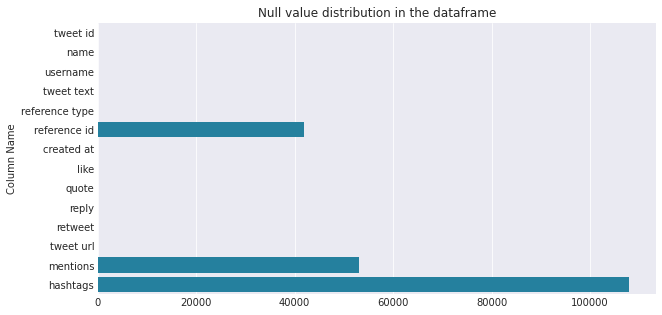

In [5]:
# Null value each column
null_counts = df.isnull().sum().to_frame('cnt').reset_index()
index, values = null_counts['index'], null_counts['cnt'].values
plt.figure(figsize=(10, 5))
sns.barplot(x=values, y=index, color=main_color)
plt.title('Null value distribution in the dataframe')
plt.ylabel('Column Name')
plt.show()

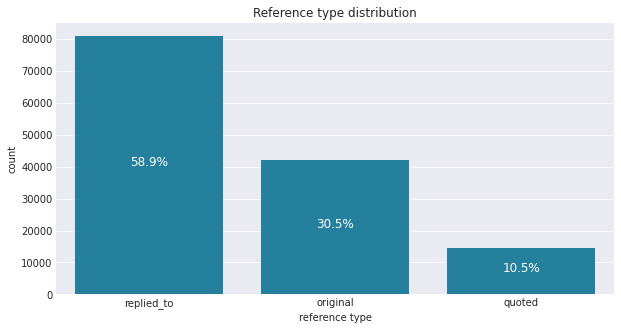

In [6]:
# Refeence type
def add_percentage(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.10
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), size = 12, color = 'w')

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='reference type', data=df, color=main_color)
add_percentage(ax, df['reference type'])
plt.title('Reference type distribution')
plt.show()

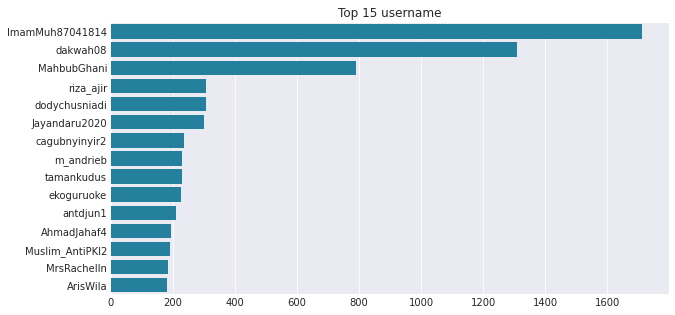

In [7]:
#top 15 username
username_count = df['username'].value_counts()
username_count = username_count[:15]

plt.figure(figsize=(10, 5))
sns.barplot(x=username_count.values, y=username_count.index, color=main_color)
plt.title('Top 15 username')
plt.show()

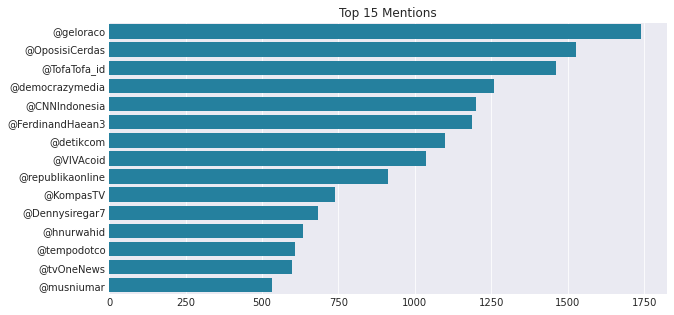

In [8]:
#top 15 mentions
mentions_count = df['mentions'].value_counts()
mentions_count = mentions_count[:15]

plt.figure(figsize=(10, 5))
sns.barplot(x=mentions_count.values, y=mentions_count.index, color=main_color)
plt.title('Top 15 Mentions')
plt.show()

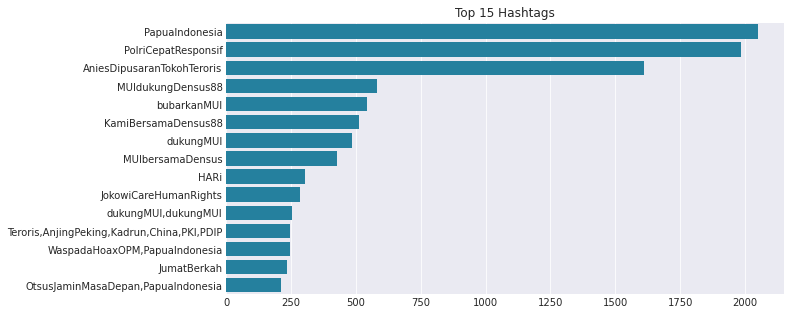

In [9]:
#top 15 hashtags
hashtags_count = df['hashtags'].value_counts()
hashtags_count = hashtags_count[:15]

plt.figure(figsize=(10, 5))
sns.barplot(x=hashtags_count.values, y=hashtags_count.index, color=main_color)
plt.title('Top 15 Hashtags')
plt.show()

In [10]:
# most liked tweets
most_like = df.sort_values('like', ascending=False)[:5]
most_like[['tweet text', 'like']]

,tweet text,like
123014,"Masih ingat penangkapan Munarman oleh Densus 88? Alasannya Munarman adalah teroris. Setelah sampai di penuntutan, ia tidak dituntut dgn UU Teroris, melainkan UU ITE.",6295
124928,"Getah apa maksudmu pak Abbas? Anda mengancam Presiden? Anda mau menakut2i negeri ini? Jika iya, SAYA, KAMI DAN RATUSAN JUTA RAKYAT INDONESIA SIAP MELAWAN BAPAK DAN GEROMBOLAN BAPAK..!!\n\nKawan2 siap melawan teroris? Jika iya, RT atau komen, biar mereka tau kita tidak takut..!! https://t.co/aVvU1rGwaJ",4981
61716,"Semoga ada pimpinan TNI yg berkata “mendidih darah saya menyaksikan putra2 terbaik bangsa gugur melawan para pemberontak itu, sudah saatnya kita kerahkan kekuatan maksimal utk menumpas gerombolan teroris KKB Papua sampai ke akar2nya.” ❤️🇮🇩\nhttps://t.co/iu1dHjKVUs",4885
62279,Jarak teroris OPM yang mengepung serta menyerang pos TNI paling dekat hanya sekitar 50 meter dan jumlahnya lebih banyak membuat prajurit TNI berada dalam posisi bertahan. https://t.co/28ppfN9rSE,4483
132393,"Sejak lama @MUIPusat memaksa Densus 88 untuk dibubarkan..\n\nTernyata baru terungkap, di internal mereka ada yang teroris. https://t.co/TNSbxXsgEk",4399


In [11]:
# most retweeted tweets
most_retweet = df.sort_values('retweet', ascending=False)[:5]
most_retweet[['tweet text', 'retweet']]

,tweet text,retweet
124928,"Getah apa maksudmu pak Abbas? Anda mengancam Presiden? Anda mau menakut2i negeri ini? Jika iya, SAYA, KAMI DAN RATUSAN JUTA RAKYAT INDONESIA SIAP MELAWAN BAPAK DAN GEROMBOLAN BAPAK..!!\n\nKawan2 siap melawan teroris? Jika iya, RT atau komen, biar mereka tau kita tidak takut..!! https://t.co/aVvU1rGwaJ",2910
123014,"Masih ingat penangkapan Munarman oleh Densus 88? Alasannya Munarman adalah teroris. Setelah sampai di penuntutan, ia tidak dituntut dgn UU Teroris, melainkan UU ITE.",2134
62279,Jarak teroris OPM yang mengepung serta menyerang pos TNI paling dekat hanya sekitar 50 meter dan jumlahnya lebih banyak membuat prajurit TNI berada dalam posisi bertahan. https://t.co/28ppfN9rSE,1337
61716,"Semoga ada pimpinan TNI yg berkata “mendidih darah saya menyaksikan putra2 terbaik bangsa gugur melawan para pemberontak itu, sudah saatnya kita kerahkan kekuatan maksimal utk menumpas gerombolan teroris KKB Papua sampai ke akar2nya.” ❤️🇮🇩\nhttps://t.co/iu1dHjKVUs",1328
34995,"Laut Natuna di ancam China,\nPapua di ancam teroris OPM,\nYang di datangi Habib Bahar.\nSooooodaaaaaaaapp. https://t.co/WHzyLii3Hj",1257


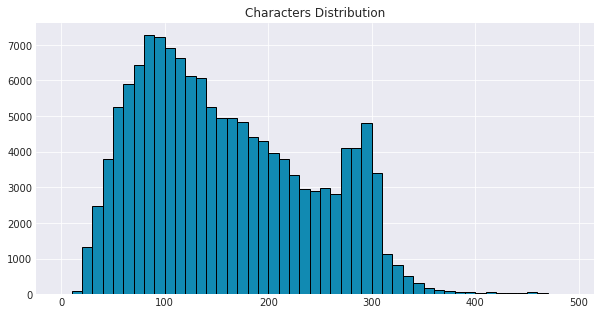

In [12]:
# number of characters in tweets
plt.figure(figsize=(10, 5))
bins = range(0,500,10)
text_len = df['tweet text'].str.len()
plt.hist(text_len, label=['Non disaster tweets'], alpha=1, bins=bins, color=main_color, edgecolor='black')
plt.title('Characters Distribution')
plt.show()

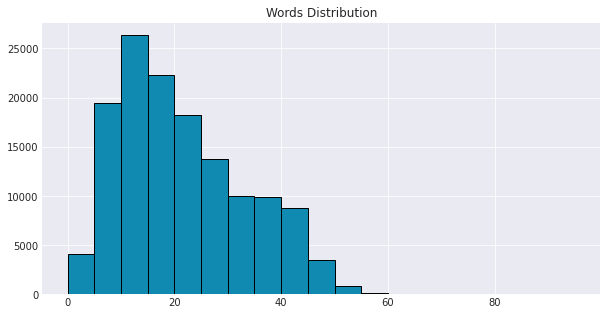

In [13]:
# number of words in tweets
plt.figure(figsize=(10, 5))
bins = range(0,100,5)
word_count = df['tweet text'].apply(lambda tw: len(str(tw).split()))
plt.hist(word_count, label=['Non disaster tweets'], alpha=1, bins=bins, color=main_color, edgecolor='black')
plt.title('Words Distribution')
plt.show()

In [14]:
df_stopwords = pd.read_csv(stopwords_dataset, header = None)
df_stopwords.head()

,0
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [15]:
df_slang_word_dataset = pd.read_csv(slang_word_dataset, header=None, encoding = "ISO-8859-1")
df_slang_word_dataset.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [16]:
tweets_corpus = []
for x in df['tweet text'].str.split():
        for i in x:
            if i[0] not in ['@', '#']:
                word = i.lower().replace(',','').replace('.','')
                if len(word) > 0 and word != 'teroris':
                    tweets_corpus.append(word)

In [17]:
counter_tweets = Counter(tweets_corpus).most_common()[:1000]

In [18]:
no_slang_words = {}
for word, val in counter_tweets:
    key = word
    if word in df_slang_word_dataset[0].values:
        word =  df_slang_word_dataset.loc[df_slang_word_dataset[0] == word, 1].values[0]
    
    if word not in no_slang_words:
        no_slang_words[word] = val
    else:
        no_slang_words[word] = val + no_slang_words[word]

In [19]:
no_stop_words = {}
for key in no_slang_words:
    if key not in df_stopwords[0].values:
        no_stop_words[key] = no_slang_words[key]

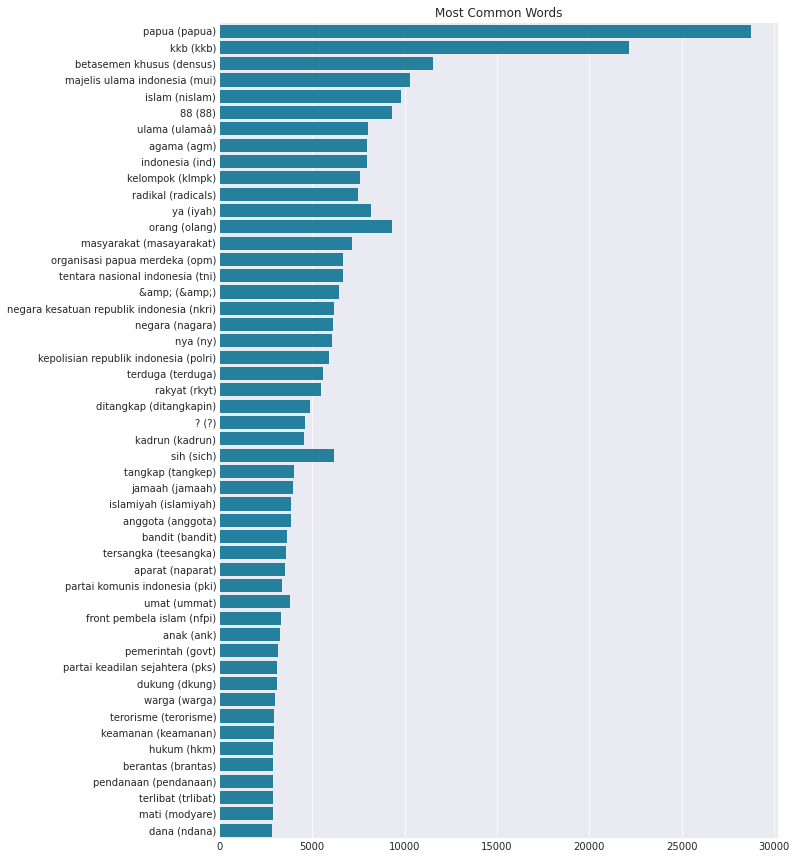

In [20]:
# Top words
top_tweets = OrderedDict(no_stop_words)

show_only = 50
    
keys = list(top_tweets.keys())
vals = [top_tweets[k] for k in keys]

original_slang = []
for word in keys:
    if word in df_slang_word_dataset[1].values:
        original_slang.append(df_slang_word_dataset.loc[df_slang_word_dataset[1] == word, 0].values[0])
    else:
        original_slang.append(word)
        
combined_words = [f'{keys[i]} ({original_slang[i]})' for i in range(len(keys))]

plt.figure(figsize=(10, 15))
sns.barplot(x=vals[:show_only], y=combined_words[:show_only], color=main_color)
plt.title('Most Common Words')
plt.show()

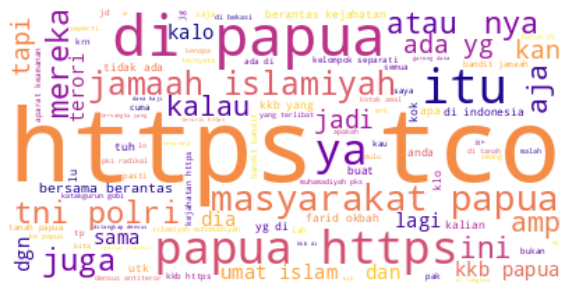

In [21]:
#Wordcloud

fig, axes = plt.subplots(ncols=1, figsize=(10, 8))
tokens_ = ' '.join(tweets_corpus)
wc_ = WordCloud(max_words=100, background_color='white', max_font_size=100, colormap='plasma').generate(tokens_)
axes.axis("off")
axes.imshow(wc_, interpolation="bilinear")
plt.show()